## 1. Imports


In [1]:
import sys
sys.path.append('../')
from scripts.visualization_utils import impact_bar_plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;

In [6]:
data_path = '../data/results/test_balanced_and balanced/'
#data_path = '../data/results/june1/'
folders= ['dt','gnb','lgr','gbt']
folders = ['dt']

## 2. Delayed Impact plots

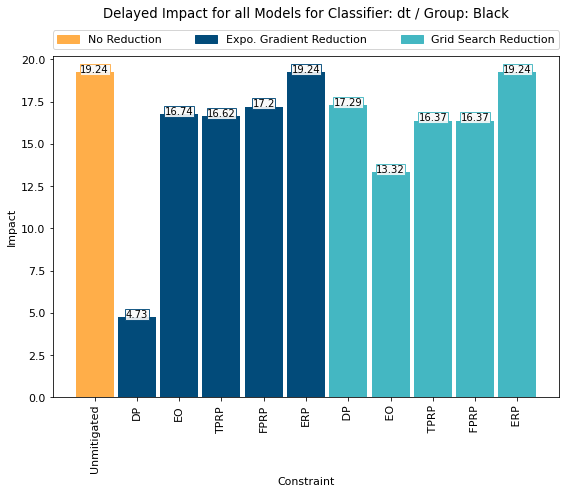

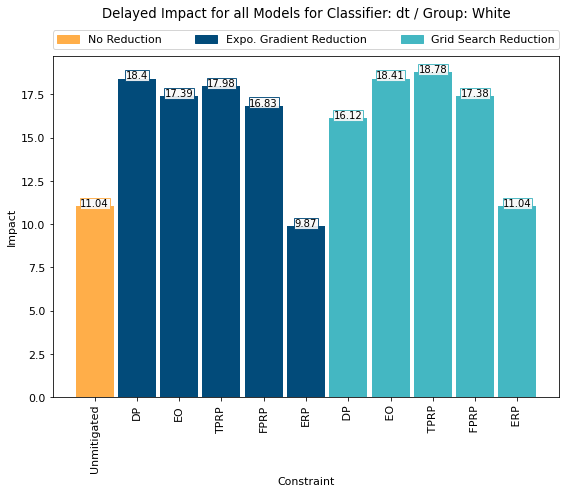

In [7]:
impact_bar_plots(data_path,'Black',folders)
impact_bar_plots(data_path,'White',folders)

## 3. Comparison of Loans Quantitys

In [8]:
# Types Dataframes
classifier_dfs = {}
dfs_b = {}
dfs_w = {}
dfs_eg = {}
dfs_gs = {}

for f in folders:
    path = f'{data_path}{f}/{f}_type_absolute.csv'
    df = pd.read_csv(path)
    df = df.set_index('Category')
    classifier_dfs[f] = df

    
print(classifier_dfs['dt'])

           egdpB   egdpW   egeoB   egeoW  egerpB  egerpW  egfprpB  egfprpW  \
Category                                                                     
FN         439.0   987.0   794.0   515.0  1318.0   277.0    823.0    423.0   
FP        1897.0   266.0   919.0   551.0   491.0  1039.0    874.0    622.0   
TN        3099.0  3274.0  4077.0  2989.0  4505.0  2501.0   4122.0   2918.0   
TP        4557.0  2553.0  4202.0  3025.0  3678.0  3263.0   4173.0   3117.0   

          egtprpB  egtprpW  ...  gserpB  gserpW  gsfprpB  gsfprpW  gstprpB  \
Category                    ...                                              
FN          777.0    516.0  ...  1318.0   201.0    760.0    463.0    760.0   
FP          936.0    521.0  ...   491.0  1006.0    961.0    576.0    961.0   
TN         4060.0   3019.0  ...  4505.0  2534.0   4035.0   2964.0   4035.0   
TP         4219.0   3024.0  ...  3678.0  3339.0   4236.0   3077.0   4236.0   

          gstprpW   testB   testW  unmitB  unmitW  
Category  

In [9]:
def visualize_tpfp(dfs = {}):
    for c,df in dfs.items():
        
        df = df.loc[['TP','FP'],:]
        df = df.transpose()
        ax = df.plot.bar(stacked=True)
        
        ax.set_title(f'Percentage of TP & FP for all Models for Classifier: {c} \n')
        ax.set_xlabel('Model')
        ax.set_ylabel('Value')


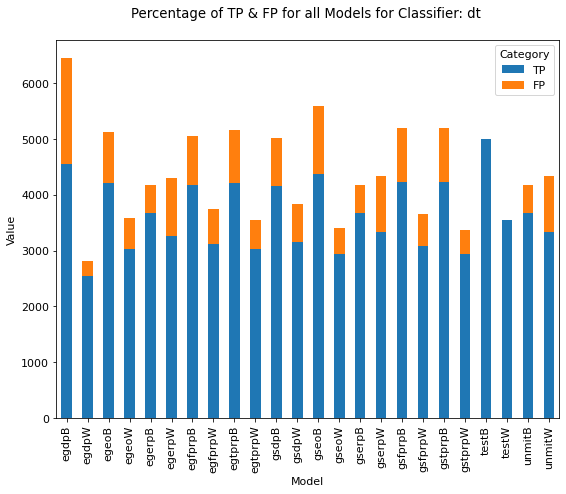

In [10]:
visualize_tpfp(classifier_dfs)

## 4. MWU p-Test results